# **Multi-Class Classification on Wine recognition dataset-**

# **Importing the packages-**

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing 
import numpy as np #numpy package will be useful for numerical computations
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes
import seaborn as sns
import plotly.express as px

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

# **Loading the dataset-**

In [ ]:
from sklearn import datasets
wine = datasets.load_wine() #loading the Wine recognition dataset 
print(wine.DESCR) #checking out the description of the dataset

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**The dataset contains 178 chemical analysis samples of wines belonging to 3 different classes (thus it is a classification problem) . Each sample is described by 13 features. The classes are distributed as follows: class_0 (59), class_1 (71), class_2 (48).**

# **EDA-**

**Exploratory Data Analysis-**

In [ ]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


**Checking null values-**

In [ ]:
#check for null/missing values
df.info()
import missingno as msno
# msno.bar(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

**Number of unique observartions:**

In [ ]:
# Number of unique observartions:

df.nunique()

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
label                             3
dtype: int64

**Are classes balanced or imbalanced?**

array([59, 71, 48])

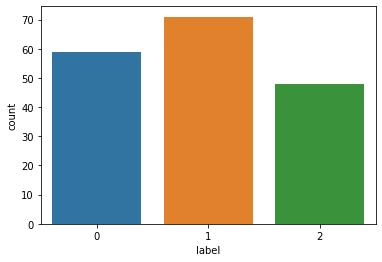

In [ ]:
count = sns.countplot(df['label'],label = 'Count') 
a,b,c = df['label'].value_counts()
np.bincount(df["label"])

**As all the classes are represented somewhat equally, we can say that the classes are balanced.**

**Students should try to explore what methods are there to deal with class imbalance data.** 

**Features correlation: is features selection or reduction necessary?**


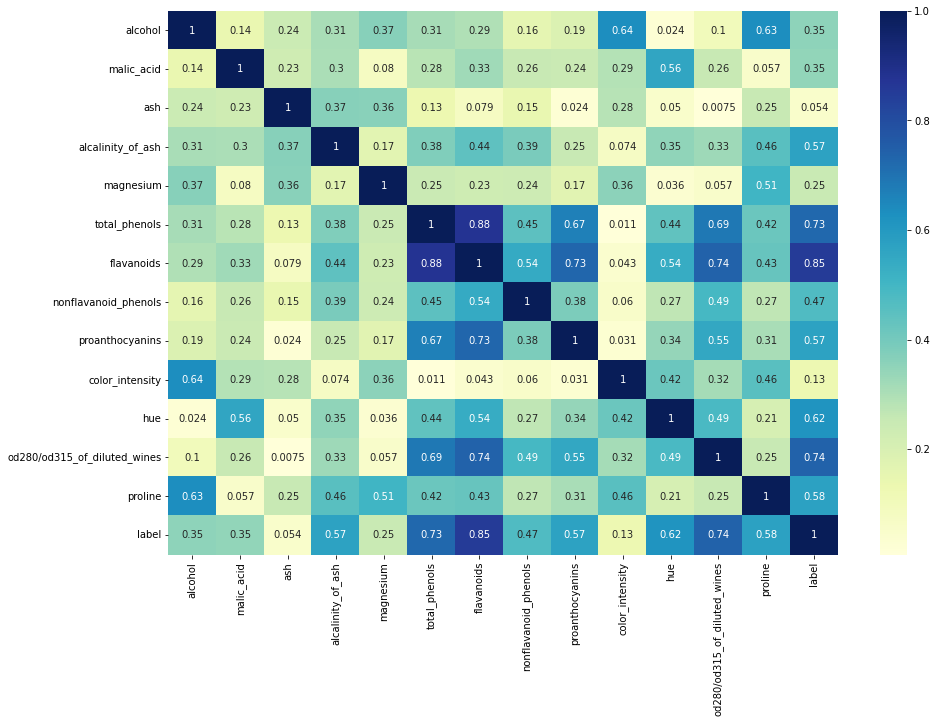

In [ ]:
corr_matrix = df.corr(method = 'spearman') #here, we are using spearmen correlation
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(abs(corr_matrix),annot = True,cmap="YlGnBu") #plotting the heatmap 
plt.show()

**Removing the highly corelated features from the dataset whose correlation is greater then 0.85 :**

In [ ]:
def correlation(data,threshold): #defining a function that will remove the highly correlated variables
  correlated_columns =[]
  correlated_matrix = corr_matrix
  for i in range(len(correlated_matrix.columns)):
    for j in range(i):
      if (correlated_matrix.iloc[i,j]) >= threshold:
        colname = correlated_matrix.columns[i]
        correlated_columns.append(colname)
  return correlated_columns

corr_features = correlation(df,0.85)
print("The number of pairs of corelated features are = ",(len(corr_features)))
print("The dropped correlated features are = ", corr_features)
df = df.drop(corr_features,axis = 1)

The number of pairs of corelated features are =  1
The dropped correlated features are =  ['flavanoids']


In [ ]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.53,1.46,9.30,0.60,1.62,840.0,2


**Feature Scaling-**

$X_{std} = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))$ \\
$X_{scaled} = X_{std} * (max - min) + min$

This transformation is often used as an alternative to zero mean, unit variance scaling.

Read more about this [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
df.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00
hue,0.48,1.71


**There are features that have much larger absolute maximum and minimum values than the others (such as 'proline'). Since I will be using the SVM algorithm for classification, I have to scale these values so that each feature has equal weight in the search for the best separation margin.**

In [ ]:
#First of all I divide the dataset into training and testing. 
y = df["label"]
X = df.iloc[:,:-1]

# **Splitting the data into train and test-**

In [ ]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0)

# **Feature scaling with Min_Max_Scaling-**

**Saling the data to equalise min and max of each feature**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

**I do the scaler fitting on the training data only.**

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[0.72043011, 0.20378151, 0.53763441, ..., 0.48717949, 1.        ,
        0.5854251 ],
       [0.31989247, 0.08403361, 0.31182796, ..., 0.27350427, 0.64102564,
        0.        ],
       [0.60215054, 0.71218487, 0.48387097, ..., 0.04273504, 0.10622711,
        0.42348178],
       ...,
       [0.37365591, 0.1512605 , 0.44623656, ..., 0.44444444, 0.61904762,
        0.02672065],
       [0.77150538, 0.16596639, 0.40860215, ..., 0.31623932, 0.75457875,
        0.54493927],
       [0.84139785, 0.34033613, 0.60215054, ..., 0.06837607, 0.16117216,
        0.28178138]])

**Now that the scaler has been trained on the training data, I do the transform on the test set. The reason I fit the scaler using only the training data is because I don't want to bias the model with information from the test data.**

In [ ]:
X_test = scaler.transform(X_test)

# **SVC hyper-parameters validation and model fitting**


**In order to validate the SVC hyper-parameters I use KFold to split the newly created training set into several training-validation 'subsets'. Each of these subsets will be trained, and then validated on the remaining data. This is where GridSearchCV comes in, which will apply different values to the hyperparameters with each training, ultimately returning the best values.**

In [ ]:
from sklearn.svm import SVC #model I will train
from sklearn.model_selection import StratifiedKFold # for splitting the training-validation data
from sklearn.model_selection import GridSearchCV #for validating hyperparameters

**Using Grid_Search_CV -**

In [ ]:
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #choose how many subsets to create
parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
              #  {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
              #  {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

model = SVC()
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}],
             verbose=1)

**Create a table with the results of the combinations, sorting them from best to worst:**

In [ ]:
scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
# int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
int_cols = ["param_C", "param_kernel", "mean_test_score"]
scores[int_cols].head() # only look at the first 5

,param_C,param_kernel,mean_test_score
rank_test_score,,,
1,1,linear,0.967667
2,0.1,linear,0.960000
3,10,linear,0.959667
4,100,linear,0.943333
5,0.01,linear,0.395000


In [ ]:
#finally I use the best values of the newly found hyperparameters to train the entire original training set, 
#evaluating its accuracy on the test set, whose data results as 'unseen'

from sklearn.metrics import accuracy_score as accuracy #accuracy metric
fitted_model = clf.best_estimator_

predictions = fitted_model.predict(X_test)
round(accuracy(y_test, predictions), 3) #evaluation

0.981

**Getting the Classification report on test data-**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Getting the confusion matrix on test data-**

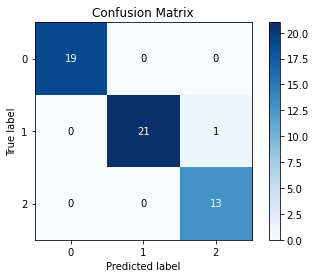

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
plt.show()